# Topics covered in this notebook
## 1. Key Concepts
## 2. Node Criteria
## 3. Information Gain
## 4. Modeling - Decision Tree

In [1]:
# Data structure
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import graphviz 

# The iris dataset
from sklearn.datasets import load_iris

# Preprocessing
from sklearn.model_selection import train_test_split

# Machine Learning Algorithm
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeClassifier

# Model validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 1. Key Concepts

#### Split node: binary split
- Find the best feature and the best cutoff point.

#### Conditional evaluation (greedy approach)
- Current route depends on all previous evaluations.

#### Prediction: Leaf node
- Classification: majority vote
- Regression: average

# 2. Node Criteria
- 2.1 Node criteria for regression tree
- 2.2 Node criteria for classification tree
- 2.3 Summary

##  2.1 Node criteria for regression tree
- Find the best pair (feature j, value s) to reduce sum square error.

$$ min_{j,s} [\sum_{x_i \in L(j,s)} (y_i - E(y_i))^2  + \sum_{x_i \in R(j,s)} (y_i - E(y_i))^2 ] $$

## 2.2 Node criteria for classification tree
- 2.2.1 Entropy
- 2.2.2 GINI
- 2.2.3 Missclassification error

In [2]:
probability = [p for p in np.arange(0,1.1,0.1)]
probability

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

### 2.2.1 Entropy
$$ Entropy = - [p \times log_2(p) + (1-p) \times log_2(1-p)] $$

In [3]:
entropy = []
for each in probability:
    entropy.append(-(each*np.log2(each) + (1-each)*np.log2(1-each)))

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# When p = 0 or 1, the corresponding entropy is 0.
entropy[0] = 0
entropy[-1] = 0

Text(0, 0.5, 'Entropy')

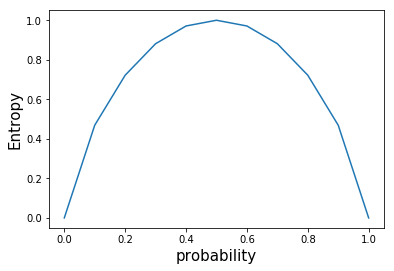

In [5]:
plt.plot(probability,entropy)
plt.xlabel('probability',fontsize=15)
plt.ylabel('Entropy',fontsize=15)

### 2.2.2 GINI
$$ GINI = 1 - [p^2 + (1-p)^2] $$

In [6]:
gini = []
for each in probability:
    gini.append(1 - (each**2+(1-each)**2))

Text(0, 0.5, 'GINI')

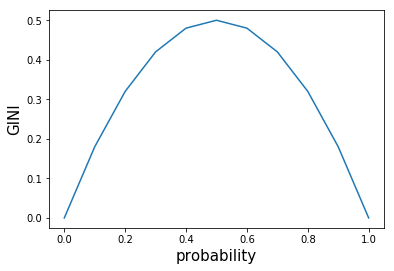

In [7]:
plt.plot(probability,gini)
plt.xlabel('probability',fontsize=15)
plt.ylabel('GINI',fontsize=15)

### 2.2.3 Missclassification error 
- It's less frequently used because we can't find derivatives and the slope is always +1 or -1.

$$ error = 1 - max(p) $$

In [8]:
miss_error = []
for each in probability:
    p = max(each, 1-each)
    miss_error.append(1-p)

Text(0, 0.5, 'error')

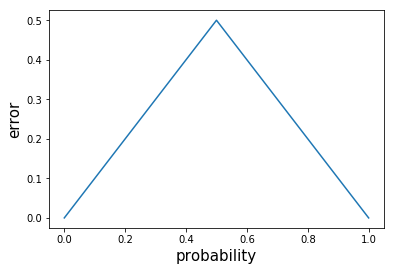

In [9]:
plt.plot(probability,miss_error)
plt.xlabel('probability',fontsize=15)
plt.ylabel('error',fontsize=15)

## 2.3 Summary
- The range in Entropy is from 0 to 1 while in GINI and Missclassification error is from 0 to 0.5.
- The goal is the same whatever the node criteria I chose. 
- Ultimately, the classification model is going to minimize the Entropy or GINI (close to the extreme points, when p = 0 or 1) such that it classifies two lables separately and completely into two groups (the Entropy or GINI is 0).

Text(0.5, 0, 'probability')

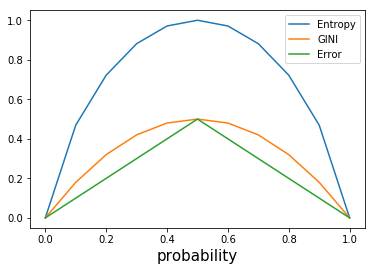

In [10]:
plt.plot(probability,entropy)
plt.plot(probability,gini)
plt.plot(probability,miss_error)
plt.legend(['Entropy','GINI','Error'])
plt.xlabel('probability',fontsize=15)

# 3. Information Gain
- Goal: Choose the feature and split with the largest IG.
$$ IG = Entropy_{before} - Entropy_{after} $$

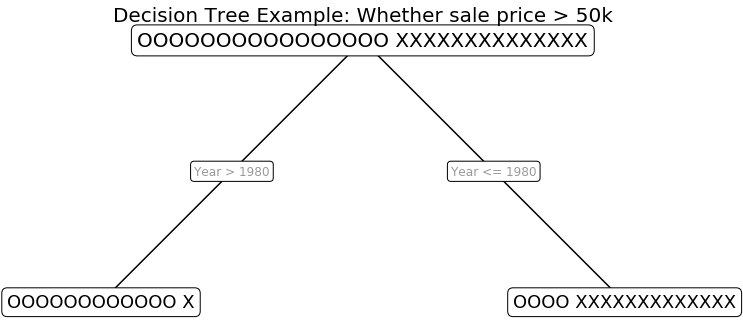

In [11]:
# Example
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Decision Tree Example: Whether sale price > 50k', size=20)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "OOOOOOOOOOOOOOOO XXXXXXXXXXXXXX", 20)
text(ax, 0.3, 0.6, "OOOOOOOOOOOO X", 18)
text(ax, 0.7, 0.6, "OOOO XXXXXXXXXXXXX", 18)

text(ax, 0.4, 0.75, "Year > 1980", 12, alpha=0.4)
text(ax, 0.6, 0.75, "Year <= 1980", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')

In [12]:
entropy_before = -(16/30 * np.log2(16/30) + 14/30 * np.log2(14/30))
print('Before 1st splitting, the Entropy in the parent node is {}.'.format(round(entropy_before,4)))

Before 1st splitting, the Entropy in the parent node is 0.9968.


In [13]:
entropy_left = -(12/13 * np.log2(12/13) + 1/13 * np.log2(1/13))
entropy_right = -(4/17 * np.log2(4/17) + 13/17 * np.log2(13/17))
print('Entropy in the left child node is {}.'.format(round(entropy_left,4)))
print('Entropy in the right child node is {}.'.format(round(entropy_right,4)))

Entropy in the left child node is 0.3912.
Entropy in the right child node is 0.7871.


In [14]:
entropy_after = (13/30) * entropy_left + (17/30) * entropy_right
print('Entropy after 1st splitting is {}.'.format(round(entropy_after,4)))

Entropy after 1st splitting is 0.6156.


In [15]:
print('Information Gain is {}.'.format(round(entropy_before - entropy_after,4)))

Information Gain is 0.3812.


# 4. Modeling - Decision Tree
- 4.1 Prepare the iris dataset 
- 4.2 Train and test splitting (80%, 20%)
- 4.3 Model fitting
- 4.4 Model performance report

## 4.1 Prepare the iris dataset

In [16]:
iris = load_iris()
x = iris['data']
y = iris['target']

## 4.2 Train and test splitting (80%, 20%)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

## 4.3 Model fitting

In [18]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## 4.4 Model performance report

In [19]:
predictions = clf.predict(x_test)

In [20]:
# The model performance on test data in each metric score is perfect!
# However, it's rare in reality.
# Thus, I will use this model in a different dataset and demonstrate how I optimize the model performance.
print(classification_report(y_true=y_test, 
                            y_pred=predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
# Confusion matrix (on test data)
pd.DataFrame(confusion_matrix(y_pred=predictions, y_true=y_test),
             columns=['Pred 0', 'Pred 1', 'Pred 2'],
             index = ['True 0', 'True 1', 'True 2'])

,Pred 0,Pred 1,Pred 2
True 0,11,0,0
True 1,0,13,0
True 2,0,0,6


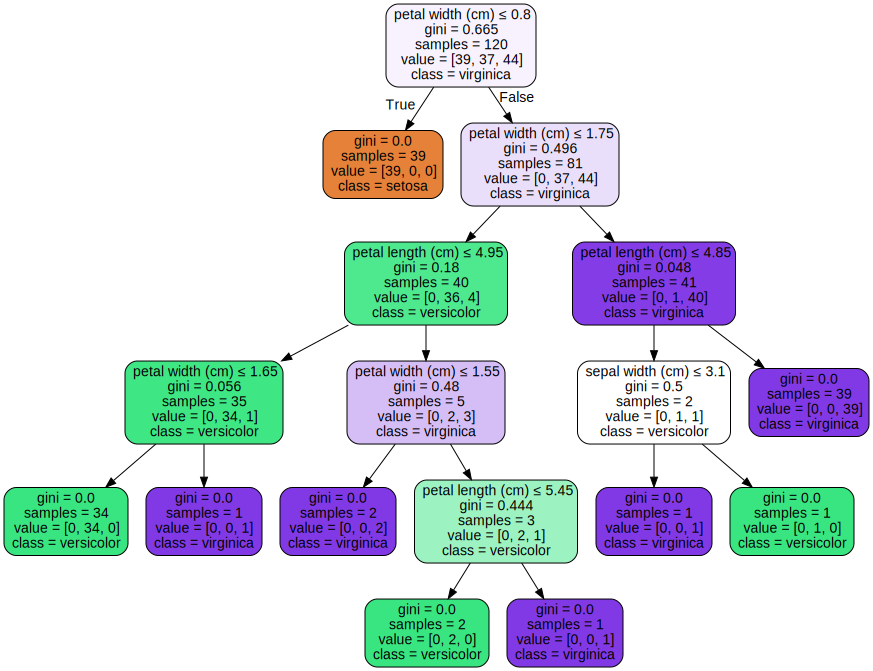

In [22]:
# Decision Tree splitting results
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 